# IBM HR Analytics - Employee Attrition Prediction
## A Complete Data Science Project

### Table of Contents
1. [Project Overview](#1-project-overview)
2. [Data Import and Setup](#2-data-import-and-setup)
3. [Exploratory Data Analysis (EDA)](#3-exploratory-data-analysis-eda)
4. [Data Preprocessing](#4-data-preprocessing)
5. [Feature Engineering](#5-feature-engineering)
6. [Machine Learning Models](#6-machine-learning-models)
7. [Model Evaluation and Comparison](#7-model-evaluation-and-comparison)
8. [Business Insights and Recommendations](#8-business-insights-and-recommendations)
9. [Conclusion](#9-conclusion)


## 1. Project Overview

### 1.1 Business Problem
Employee attrition is a critical challenge for organizations, leading to:
- Increased recruitment and training costs
- Loss of institutional knowledge
- Decreased team productivity
- Negative impact on company culture

### 1.2 Objective
- **Primary Goal**: Predict employee attrition using machine learning
- **Secondary Goals**: 
  - Identify key factors contributing to employee turnover
  - Provide actionable insights for HR strategy
  - Build a robust predictive model for proactive retention

### 1.3 Dataset Information
- **Source**: IBM HR Analytics Employee Attrition & Performance
- **Size**: 1,470 employees with 35 features
- **Target Variable**: Attrition (Yes/No)
- **Type**: Classification Problem


## 2. Data Import and Setup

In [5]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Machine Learning Libraries
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
from sklearn.tree import DecisionTreeClassifier
import xgboost as xgb

# Statistical Libraries
from scipy import stats
from scipy.stats import chi2_contingency

# Set style for better visualizations
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

In [6]:
df = pd.read_csv('IBMDATA.csv')

# Display basic information
print("Dataset Shape:", df.shape)
print("\nDataset Info:")
print(df.info())

Dataset Shape: (1470, 35)

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-nu

In [7]:
# Display first few rows
print("First 5 rows of the dataset:")
df.head()

First 5 rows of the dataset:


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


## 3. Exploratory Data Analysis (EDA)

### 3.1 Data Quality Assessment

In [9]:
# Check for missing values
print("Missing Values:")
print(df.isnull().sum())
print(f"\nTotal missing values: {df.isnull().sum().sum()}")



# Check for duplicate rows
print(f"Duplicate rows: {df.duplicated().sum()}")



# Basic statistics
print("Dataset Statistics:")
print(df.describe())

Missing Values:
Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole      

### 3.2 Target Variable Analysis


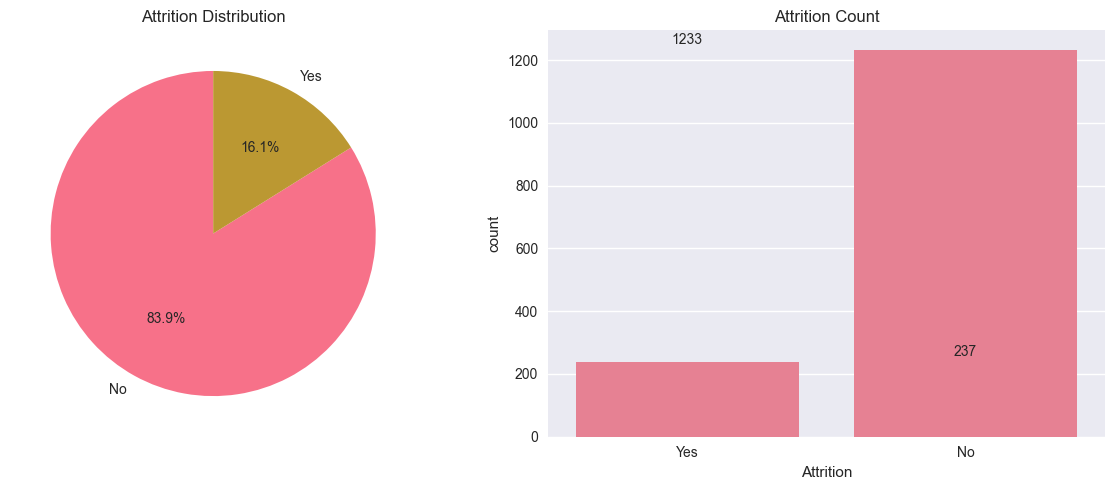

Attrition Rate: 16.12%


In [10]:
# Attrition distribution
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
attrition_counts = df['Attrition'].value_counts()
plt.pie(attrition_counts.values, labels=attrition_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Attrition Distribution')

plt.subplot(1, 2, 2)
sns.countplot(data=df, x='Attrition')
plt.title('Attrition Count')
for i, v in enumerate(attrition_counts.values):
    plt.text(i, v + 10, str(v), ha='center', va='bottom')

plt.tight_layout()
plt.show()

print(f"Attrition Rate: {(attrition_counts['Yes'] / len(df)) * 100:.2f}%")

### 3.3 Univariate Analysis

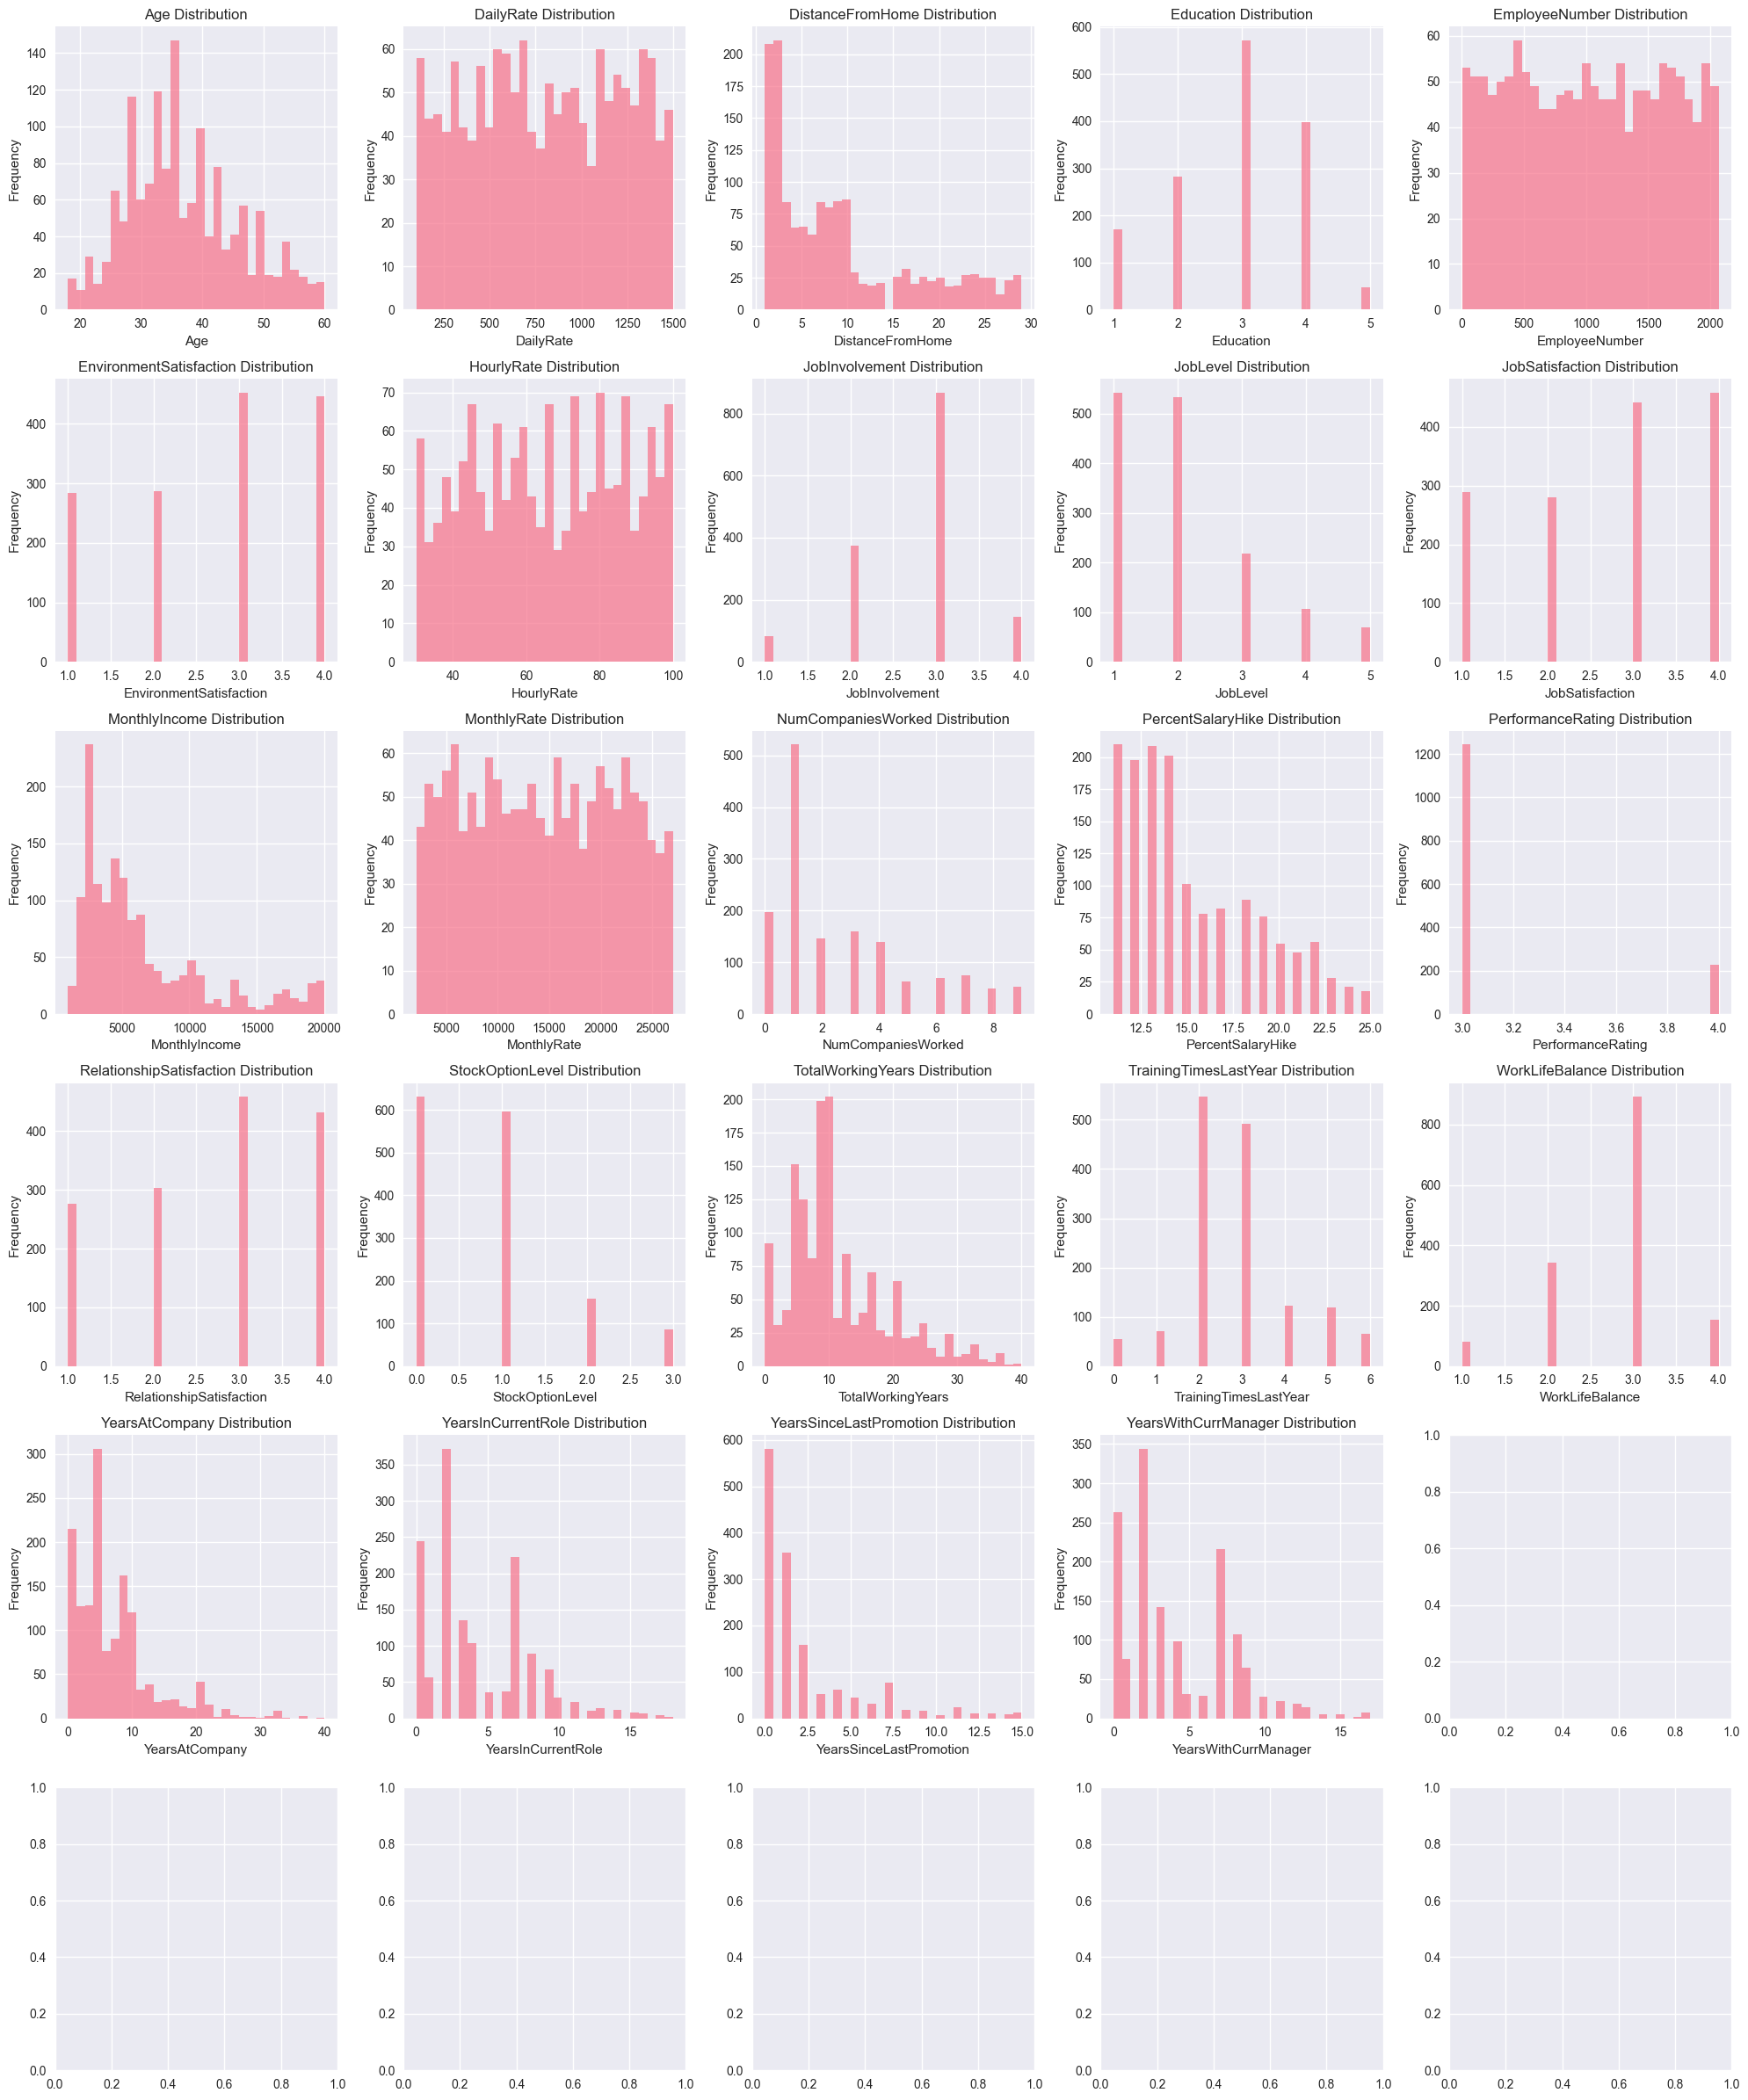

In [12]:
# Numerical features distribution
numerical_features = df.select_dtypes(include=[np.number]).columns.tolist()
numerical_features.remove('EmployeeCount')  # Remove constant features
numerical_features.remove('StandardHours')  # Remove constant features

fig, axes = plt.subplots(6, 5, figsize=(20, 24))
axes = axes.ravel()

for idx, feature in enumerate(numerical_features):
    if idx < len(axes):
        df[feature].hist(bins=30, ax=axes[idx], alpha=0.7)
        axes[idx].set_title(f'{feature} Distribution')
        axes[idx].set_xlabel(feature)
        axes[idx].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

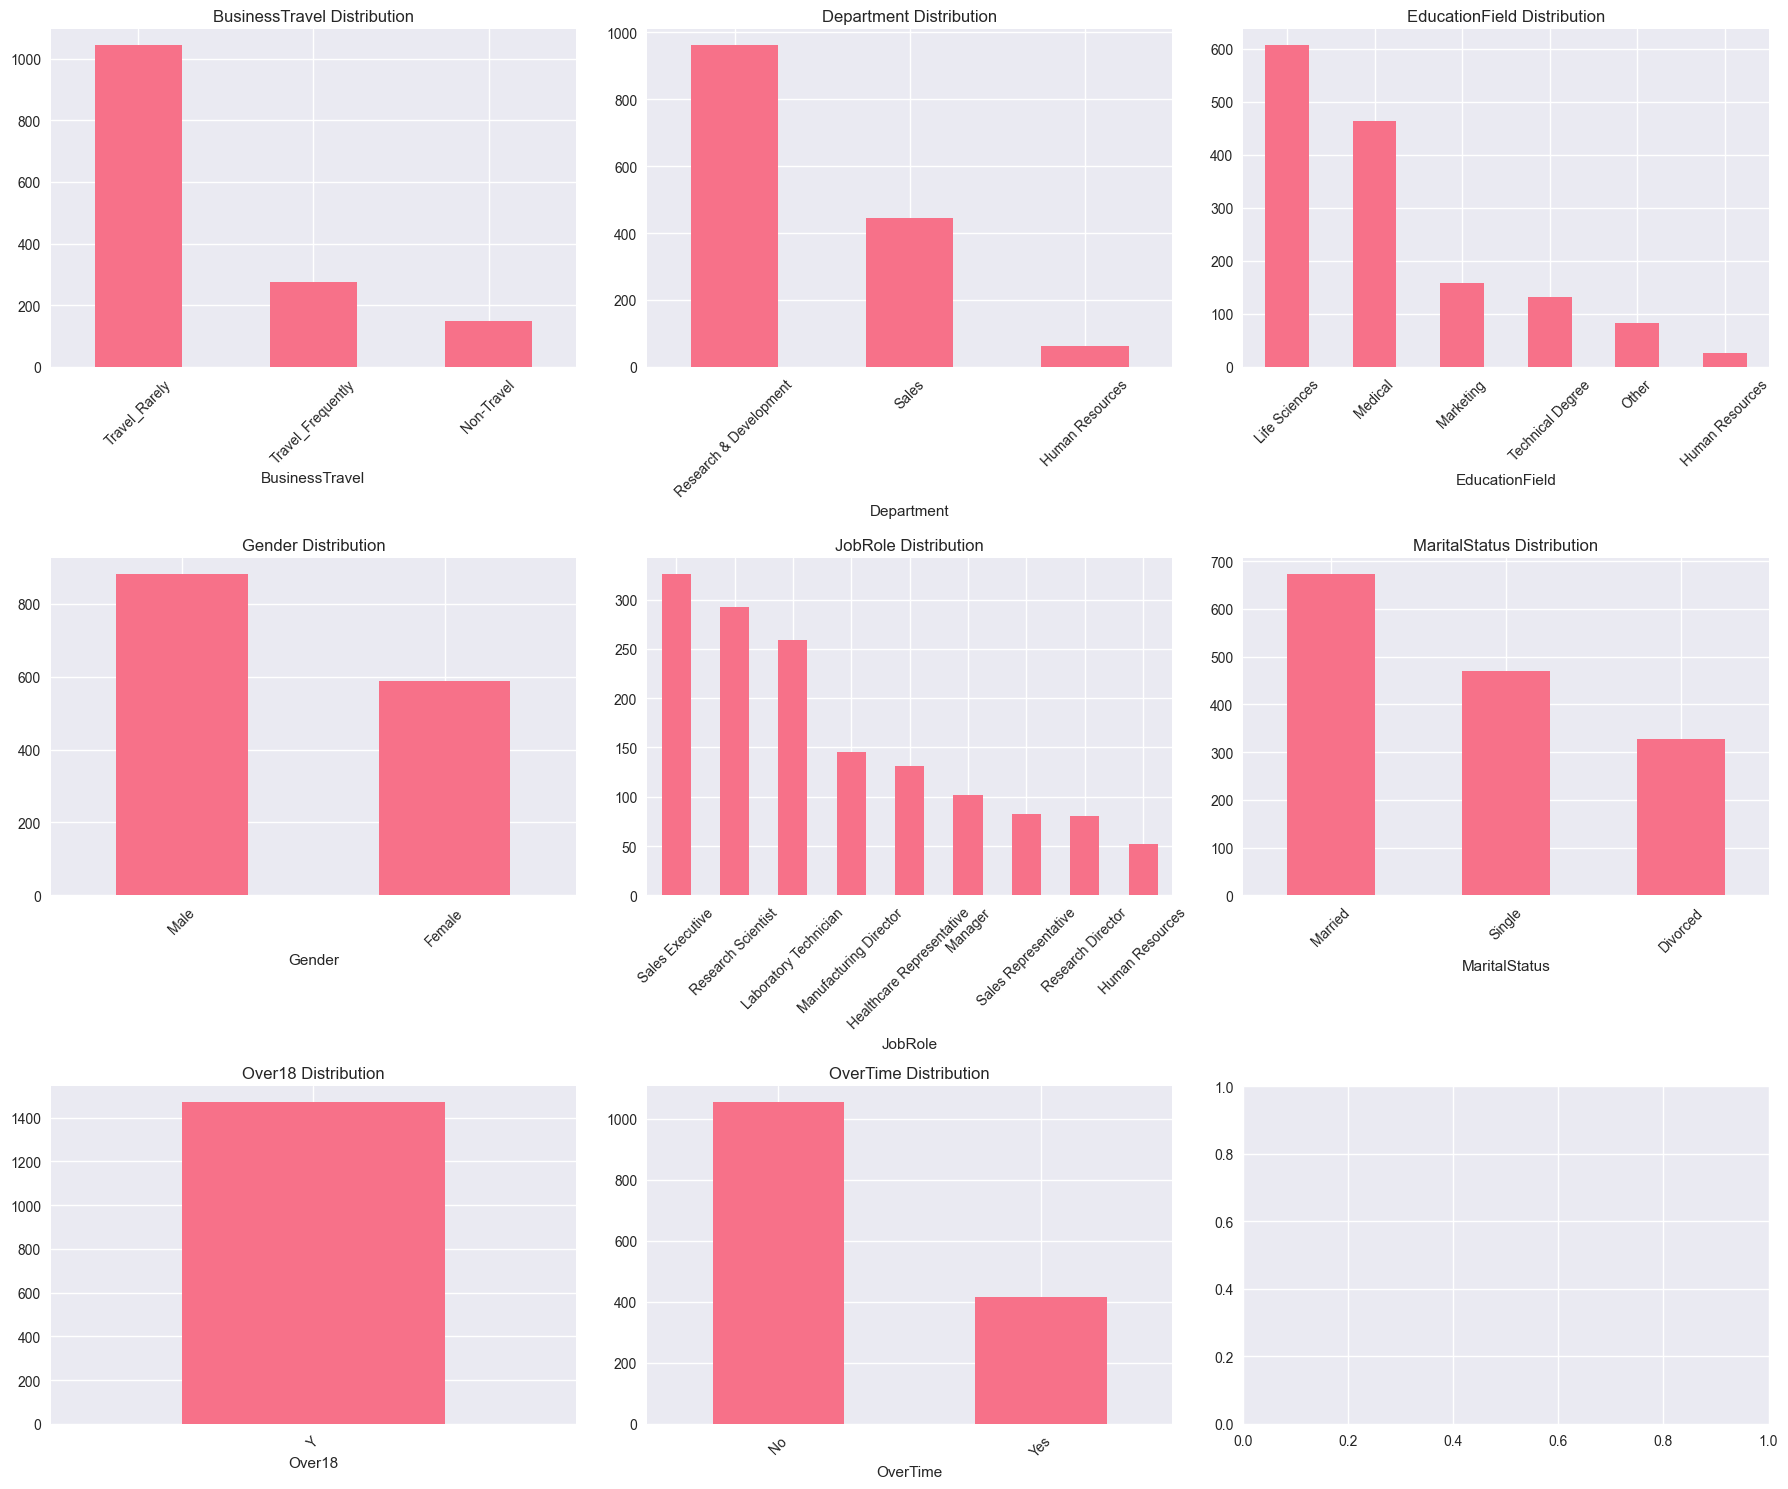

In [13]:
# Categorical features distribution
categorical_features = df.select_dtypes(include=['object']).columns.tolist()
categorical_features.remove('Attrition')  # Remove target variable

fig, axes = plt.subplots(3, 3, figsize=(18, 15))
axes = axes.ravel()

for idx, feature in enumerate(categorical_features):
    if idx < len(axes):
        df[feature].value_counts().plot(kind='bar', ax=axes[idx])
        axes[idx].set_title(f'{feature} Distribution')
        axes[idx].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

### 3.4 Bivariate Analysis

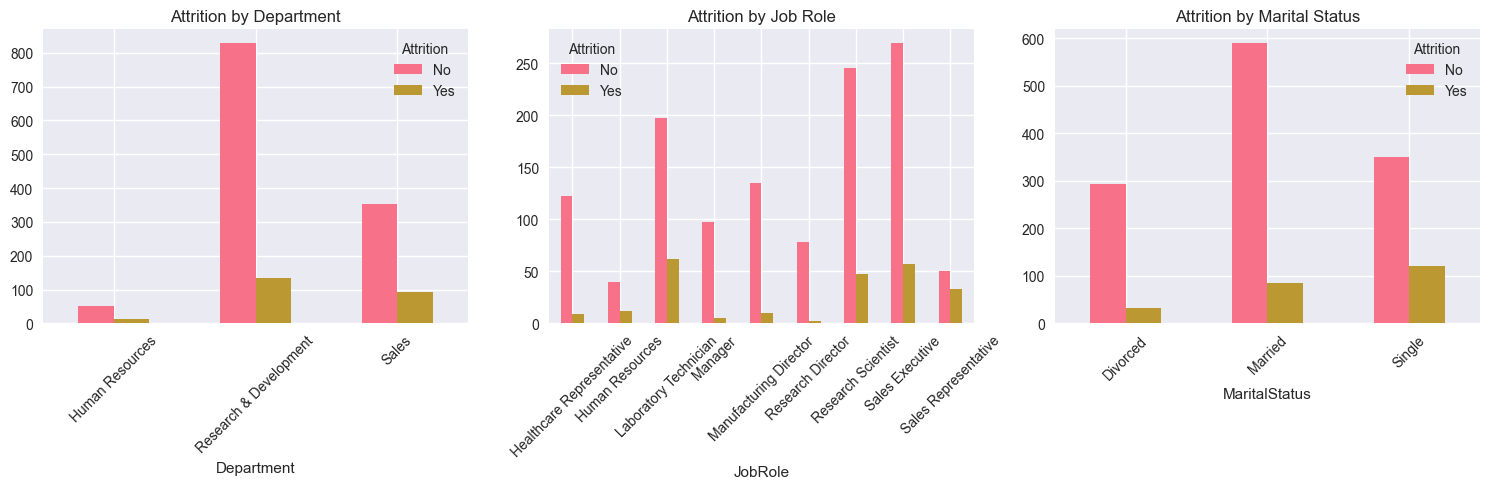

In [14]:
# Attrition by Department
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
pd.crosstab(df['Department'], df['Attrition']).plot(kind='bar', ax=plt.gca())
plt.title('Attrition by Department')
plt.xticks(rotation=45)

plt.subplot(1, 3, 2)
pd.crosstab(df['JobRole'], df['Attrition']).plot(kind='bar', ax=plt.gca())
plt.title('Attrition by Job Role')
plt.xticks(rotation=45)

plt.subplot(1, 3, 3)
pd.crosstab(df['MaritalStatus'], df['Attrition']).plot(kind='bar', ax=plt.gca())
plt.title('Attrition by Marital Status')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

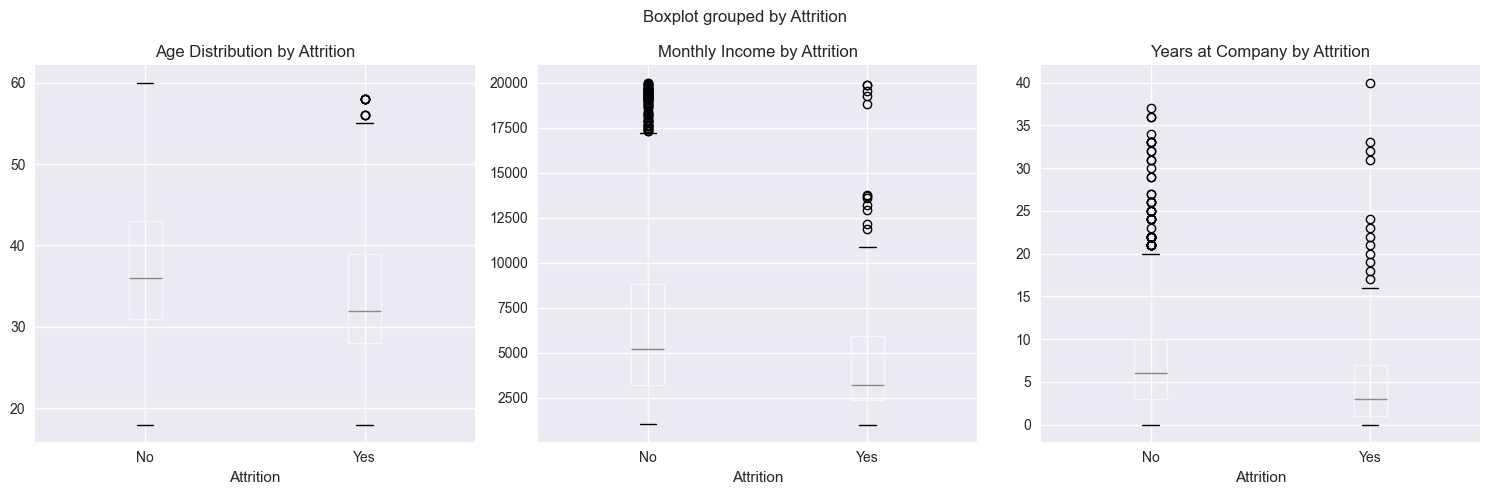

In [15]:
# Age and Attrition Analysis
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
df.boxplot(column='Age', by='Attrition', ax=plt.gca())
plt.title('Age Distribution by Attrition')

plt.subplot(1, 3, 2)
df.boxplot(column='MonthlyIncome', by='Attrition', ax=plt.gca())
plt.title('Monthly Income by Attrition')

plt.subplot(1, 3, 3)
df.boxplot(column='YearsAtCompany', by='Attrition', ax=plt.gca())
plt.title('Years at Company by Attrition')

plt.tight_layout()
plt.show()

### 3.5 Correlation Analysis

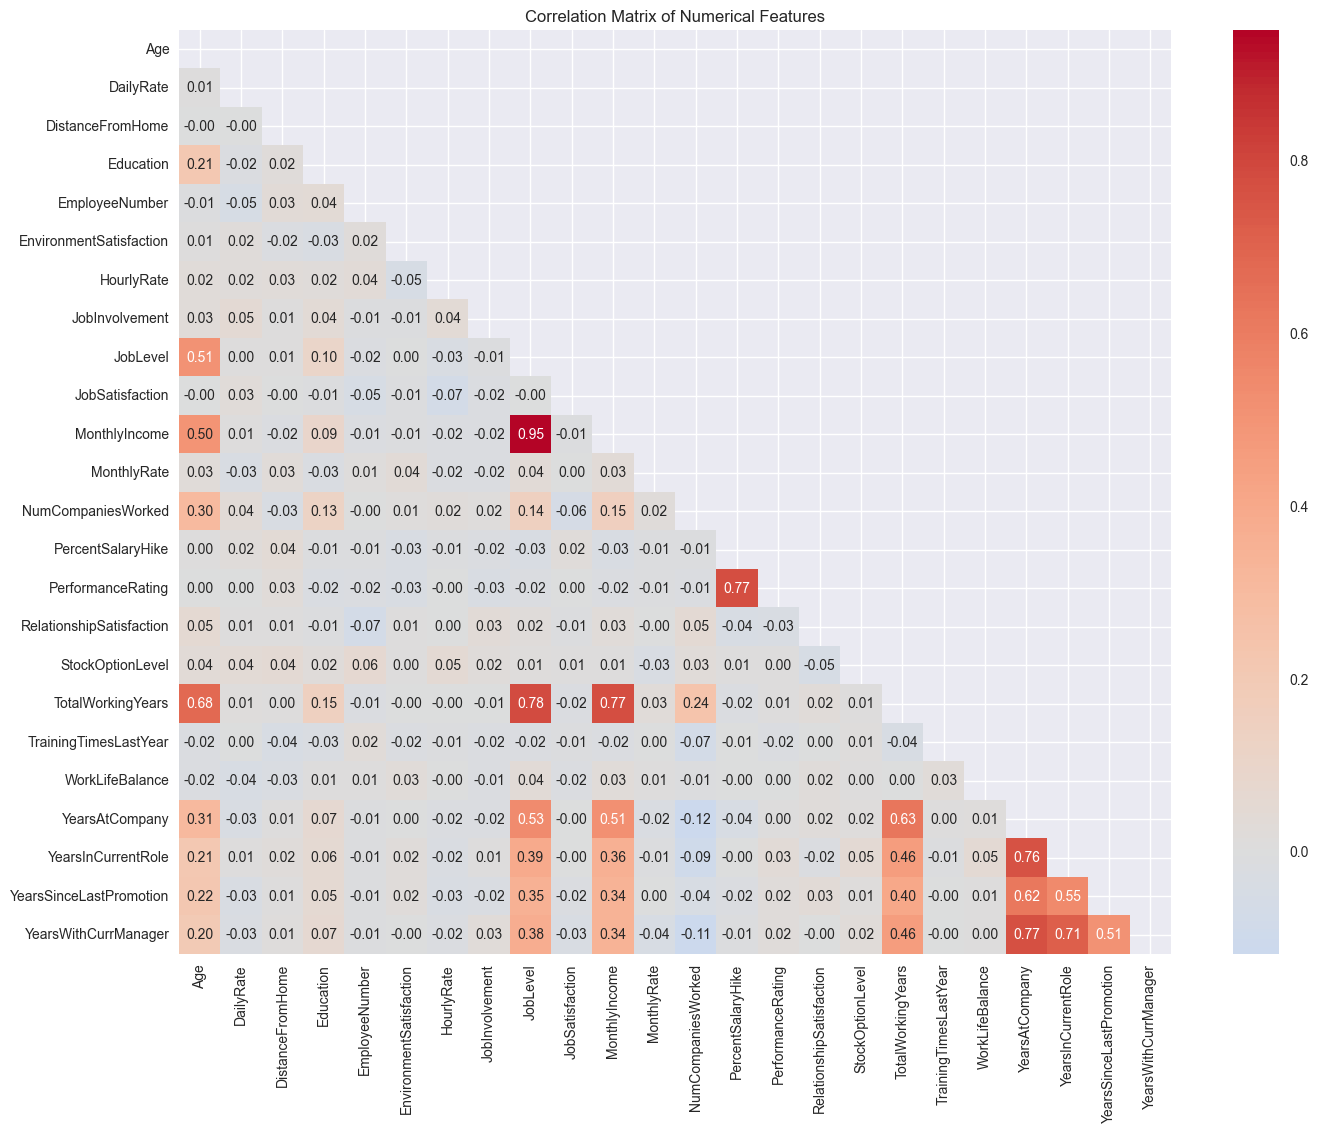

Highly Correlated Feature Pairs (|correlation| > 0.7):
JobLevel - MonthlyIncome: 0.950
JobLevel - TotalWorkingYears: 0.782
MonthlyIncome - TotalWorkingYears: 0.773
PercentSalaryHike - PerformanceRating: 0.774
YearsAtCompany - YearsInCurrentRole: 0.759
YearsAtCompany - YearsWithCurrManager: 0.769
YearsInCurrentRole - YearsWithCurrManager: 0.714


In [18]:
# Correlation matrix for numerical features
plt.figure(figsize=(16, 12))
correlation_matrix = df[numerical_features].corr()
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
sns.heatmap(correlation_matrix, mask=mask, annot=True, cmap='coolwarm', center=0, fmt='.2f')
plt.title('Correlation Matrix of Numerical Features')
plt.show()

# High correlation pairs
high_corr_pairs = []
for i in range(len(correlation_matrix.columns)):
    for j in range(i+1, len(correlation_matrix.columns)):
        if abs(correlation_matrix.iloc[i, j]) > 0.7:
            high_corr_pairs.append((correlation_matrix.columns[i], 
                                  correlation_matrix.columns[j], 
                                  correlation_matrix.iloc[i, j]))

print("Highly Correlated Feature Pairs (|correlation| > 0.7):")
for pair in high_corr_pairs:
    print(f"{pair[0]} - {pair[1]}: {pair[2]:.3f}")

### 3.6 Advanced EDA

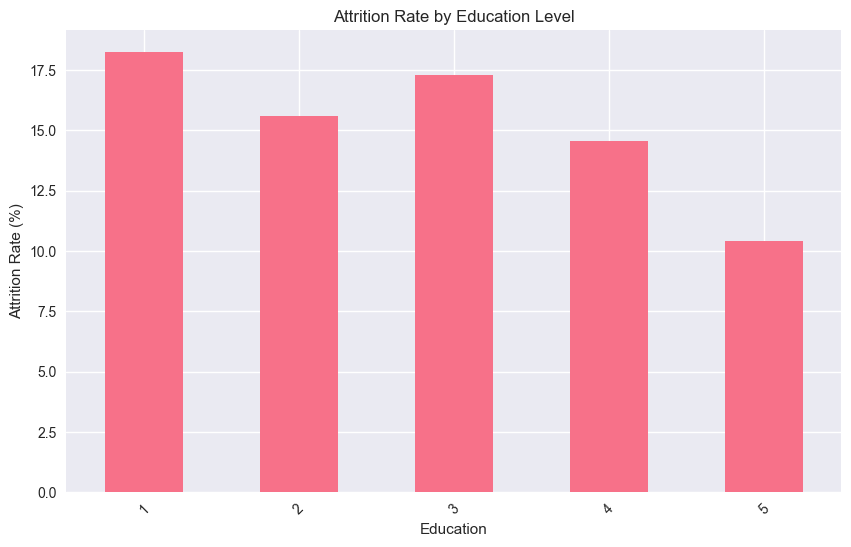

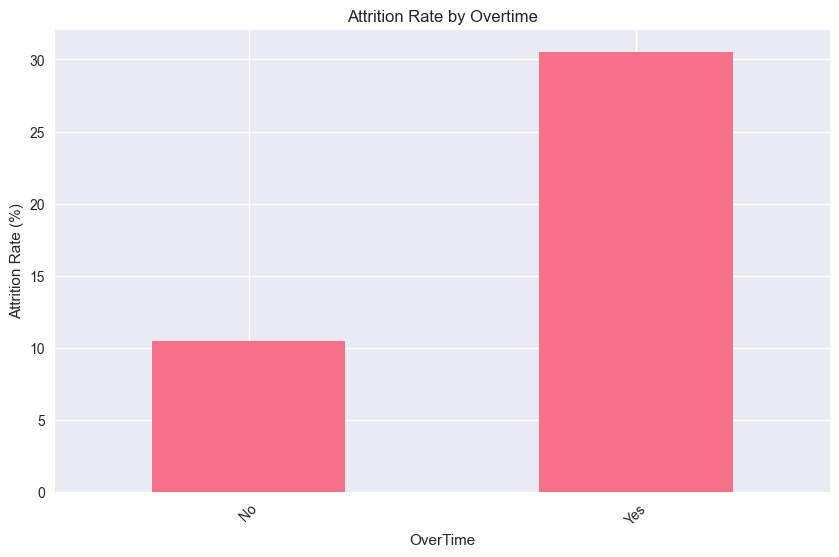

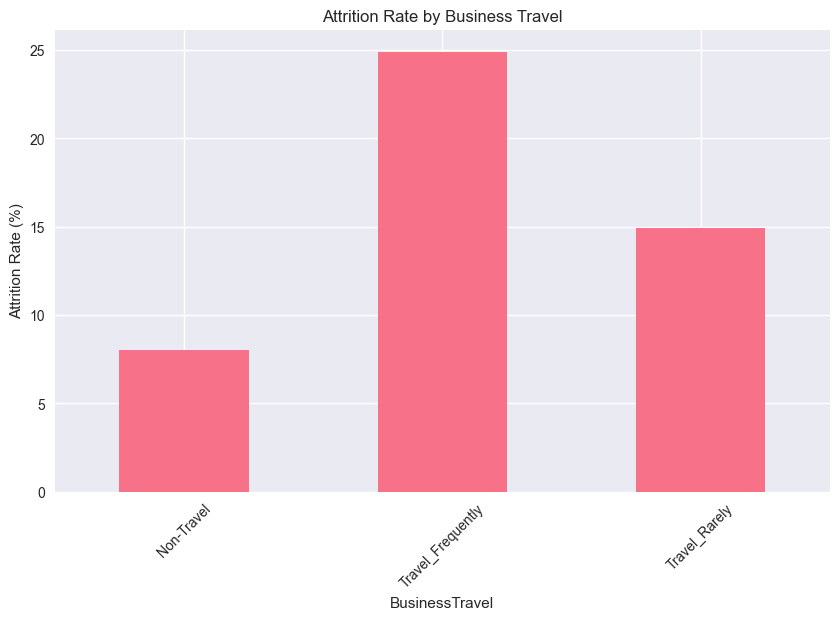

In [19]:
# Attrition rate by different categories
def plot_attrition_rate(feature, title):
    attrition_rate = df.groupby(feature)['Attrition'].apply(lambda x: (x=='Yes').sum()/len(x)*100)
    plt.figure(figsize=(10, 6))
    attrition_rate.plot(kind='bar')
    plt.title(f'Attrition Rate by {title}')
    plt.ylabel('Attrition Rate (%)')
    plt.xticks(rotation=45)
    plt.show()
    return attrition_rate

# Plot attrition rates for key features
education_attrition = plot_attrition_rate('Education', 'Education Level')
overtime_attrition = plot_attrition_rate('OverTime', 'Overtime')
travel_attrition = plot_attrition_rate('BusinessTravel', 'Business Travel')

## 4. Data Preprocessing

### 4.1 Handle Categorical Variables

In [20]:
# Create a copy of the dataset for preprocessing
df_processed = df.copy()

# Remove irrelevant columns
columns_to_drop = ['EmployeeCount', 'EmployeeNumber', 'StandardHours', 'Over18']
df_processed = df_processed.drop(columns_to_drop, axis=1)

print(f"Shape after removing irrelevant columns: {df_processed.shape}")

Shape after removing irrelevant columns: (1470, 31)


In [21]:
# Encode categorical variables
label_encoders = {}
categorical_columns = df_processed.select_dtypes(include=['object']).columns

for column in categorical_columns:
    if column != 'Attrition':  # Don't encode target variable yet
        le = LabelEncoder()
        df_processed[column] = le.fit_transform(df_processed[column])
        label_encoders[column] = le

# Encode target variable
df_processed['Attrition'] = df_processed['Attrition'].map({'No': 0, 'Yes': 1})

print("Categorical variables encoded successfully!")
print(f"Final dataset shape: {df_processed.shape}")


Categorical variables encoded successfully!
Final dataset shape: (1470, 31)


### 4.2 Feature Scaling

In [23]:
# Separate features and target
X = df_processed.drop('Attrition', axis=1)
y = df_processed['Attrition']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print(f"Training set shape: {X_train_scaled.shape}")
print(f"Test set shape: {X_test_scaled.shape}")
print(f"Class distribution in training set: {np.bincount(y_train)}")
print(f"Class distribution in test set: {np.bincount(y_test)}")

Training set shape: (1176, 30)
Test set shape: (294, 30)
Class distribution in training set: [986 190]
Class distribution in test set: [247  47]



## 5. Feature Engineering

### 5.1 Feature Importance Analysis

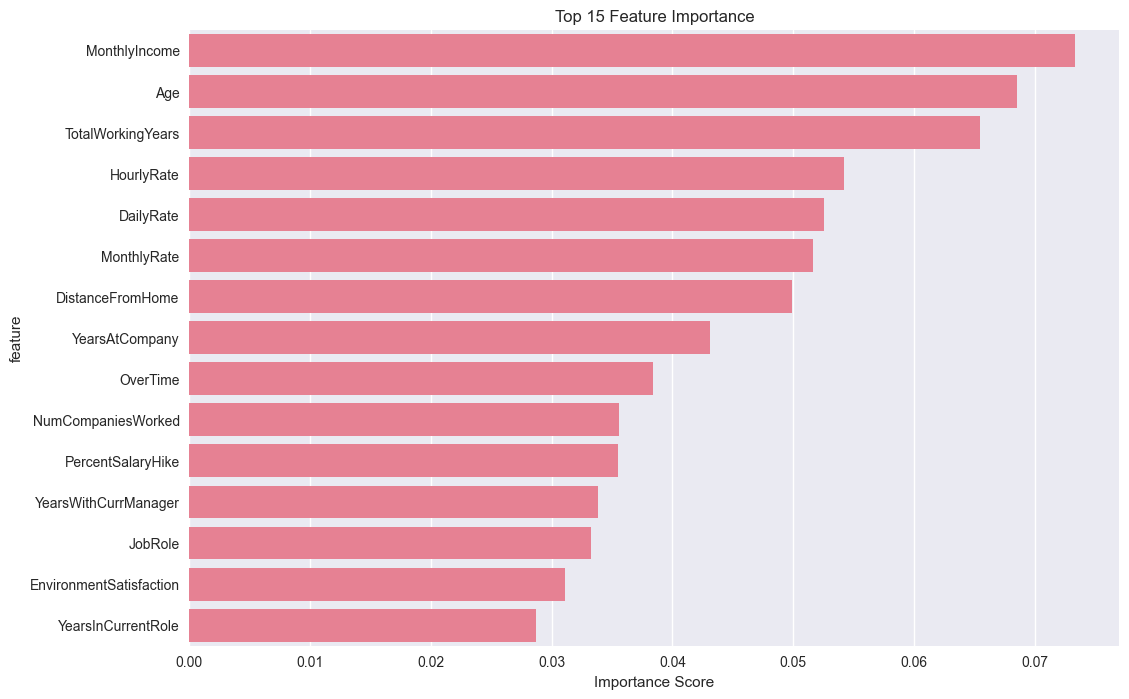

Top 10 Most Important Features:
               feature  importance
15       MonthlyIncome    0.073336
0                  Age    0.068557
23   TotalWorkingYears    0.065480
9           HourlyRate    0.054217
2            DailyRate    0.052526
16         MonthlyRate    0.051631
4     DistanceFromHome    0.049930
26      YearsAtCompany    0.043107
18            OverTime    0.038350
17  NumCompaniesWorked    0.035546


In [24]:
# Use Random Forest to get feature importance
rf_temp = RandomForestClassifier(n_estimators=100, random_state=42)
rf_temp.fit(X_train, y_train)

# Get feature importance
feature_importance = pd.DataFrame({
    'feature': X.columns,
    'importance': rf_temp.feature_importances_
}).sort_values('importance', ascending=False)

# Plot feature importance
plt.figure(figsize=(12, 8))
sns.barplot(data=feature_importance.head(15), x='importance', y='feature')
plt.title('Top 15 Feature Importance')
plt.xlabel('Importance Score')
plt.show()

print("Top 10 Most Important Features:")
print(feature_importance.head(10))

### 5.2 Create New Features

In [25]:
# Create new features based on domain knowledge
df_engineered = df_processed.copy()

# Age groups
df_engineered['AgeGroup'] = pd.cut(df_engineered['Age'], 
                                  bins=[0, 30, 40, 50, 100], 
                                  labels=['Young', 'Middle', 'Senior', 'Veteran'])
df_engineered['AgeGroup'] = df_engineered['AgeGroup'].cat.codes

# Income to age ratio
df_engineered['IncomeToAge'] = df_engineered['MonthlyIncome'] / df_engineered['Age']

# Work-life balance score
df_engineered['WorkLifeScore'] = (df_engineered['WorkLifeBalance'] * 2 + 
                                 df_engineered['JobSatisfaction'] + 
                                 df_engineered['EnvironmentSatisfaction']) / 4

# Career progression ratio
df_engineered['CareerProgression'] = (df_engineered['YearsInCurrentRole'] / 
                                     (df_engineered['YearsAtCompany'] + 1))

# Total satisfaction score
df_engineered['TotalSatisfaction'] = (df_engineered['JobSatisfaction'] + 
                                     df_engineered['EnvironmentSatisfaction'] + 
                                     df_engineered['RelationshipSatisfaction']) / 3

print("New features created:")
print("- AgeGroup")
print("- IncomeToAge") 
print("- WorkLifeScore")
print("- CareerProgression")
print("- TotalSatisfaction")

New features created:
- AgeGroup
- IncomeToAge
- WorkLifeScore
- CareerProgression
- TotalSatisfaction



## 6. Machine Learning Models

### 6.1 Model Selection and Training

In [28]:
# Prepare data with engineered features
X_eng = df_engineered.drop('Attrition', axis=1)
y_eng = df_engineered['Attrition']

# Train-test split
X_train_eng, X_test_eng, y_train_eng, y_test_eng = train_test_split(
    X_eng, y_eng, test_size=0.2, random_state=42, stratify=y_eng)

# Scale features
scaler_eng = StandardScaler()
X_train_eng_scaled = scaler_eng.fit_transform(X_train_eng)
X_test_eng_scaled = scaler_eng.transform(X_test_eng)

In [29]:
# Initialize models
models = {
    'Logistic Regression': LogisticRegression(random_state=42, max_iter=1000),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42),
    'XGBoost': xgb.XGBClassifier(random_state=42),
    'SVM': SVC(random_state=42, probability=True)
}

# Train and evaluate models
model_results = {}

for name, model in models.items():
    print(f"\nTraining {name}...")
    
    # Use scaled data for models that benefit from scaling
    if name in ['Logistic Regression', 'SVM']:
        model.fit(X_train_eng_scaled, y_train_eng)
        y_pred = model.predict(X_test_eng_scaled)
        y_pred_proba = model.predict_proba(X_test_eng_scaled)[:, 1]
    else:
        model.fit(X_train_eng, y_train_eng)
        y_pred = model.predict(X_test_eng)
        y_pred_proba = model.predict_proba(X_test_eng)[:, 1]
    
    # Calculate metrics
    from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
    
    accuracy = accuracy_score(y_test_eng, y_pred)
    precision = precision_score(y_test_eng, y_pred)
    recall = recall_score(y_test_eng, y_pred)
    f1 = f1_score(y_test_eng, y_pred)
    auc = roc_auc_score(y_test_eng, y_pred_proba)
    
    model_results[name] = {
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1-Score': f1,
        'AUC-ROC': auc,
        'Model': model
    }
    
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1-Score: {f1:.4f}")
    print(f"AUC-ROC: {auc:.4f}")


Training Logistic Regression...
Accuracy: 0.8776
Precision: 0.7200
Recall: 0.3830
F1-Score: 0.5000
AUC-ROC: 0.8073

Training Decision Tree...
Accuracy: 0.7823
Precision: 0.3191
Recall: 0.3191
F1-Score: 0.3191
AUC-ROC: 0.5948

Training Random Forest...
Accuracy: 0.8469
Precision: 0.6250
Recall: 0.1064
F1-Score: 0.1818
AUC-ROC: 0.7913

Training Gradient Boosting...
Accuracy: 0.8435
Precision: 0.5263
Recall: 0.2128
F1-Score: 0.3030
AUC-ROC: 0.7931

Training XGBoost...
Accuracy: 0.8435
Precision: 0.5294
Recall: 0.1915
F1-Score: 0.2812
AUC-ROC: 0.7710

Training SVM...
Accuracy: 0.8571
Precision: 0.6667
Recall: 0.2128
F1-Score: 0.3226
AUC-ROC: 0.8159


### 6.2 Model Comparison

Model Comparison Results:
                     Accuracy Precision    Recall  F1-Score   AUC-ROC
Logistic Regression  0.877551      0.72  0.382979       0.5  0.807305
Decision Tree        0.782313  0.319149  0.319149  0.319149  0.594797
Random Forest        0.846939     0.625  0.106383  0.181818  0.791326
Gradient Boosting    0.843537  0.526316  0.212766   0.30303  0.793092
XGBoost              0.843537  0.529412  0.191489   0.28125   0.77104
SVM                  0.857143  0.666667  0.212766  0.322581  0.815919


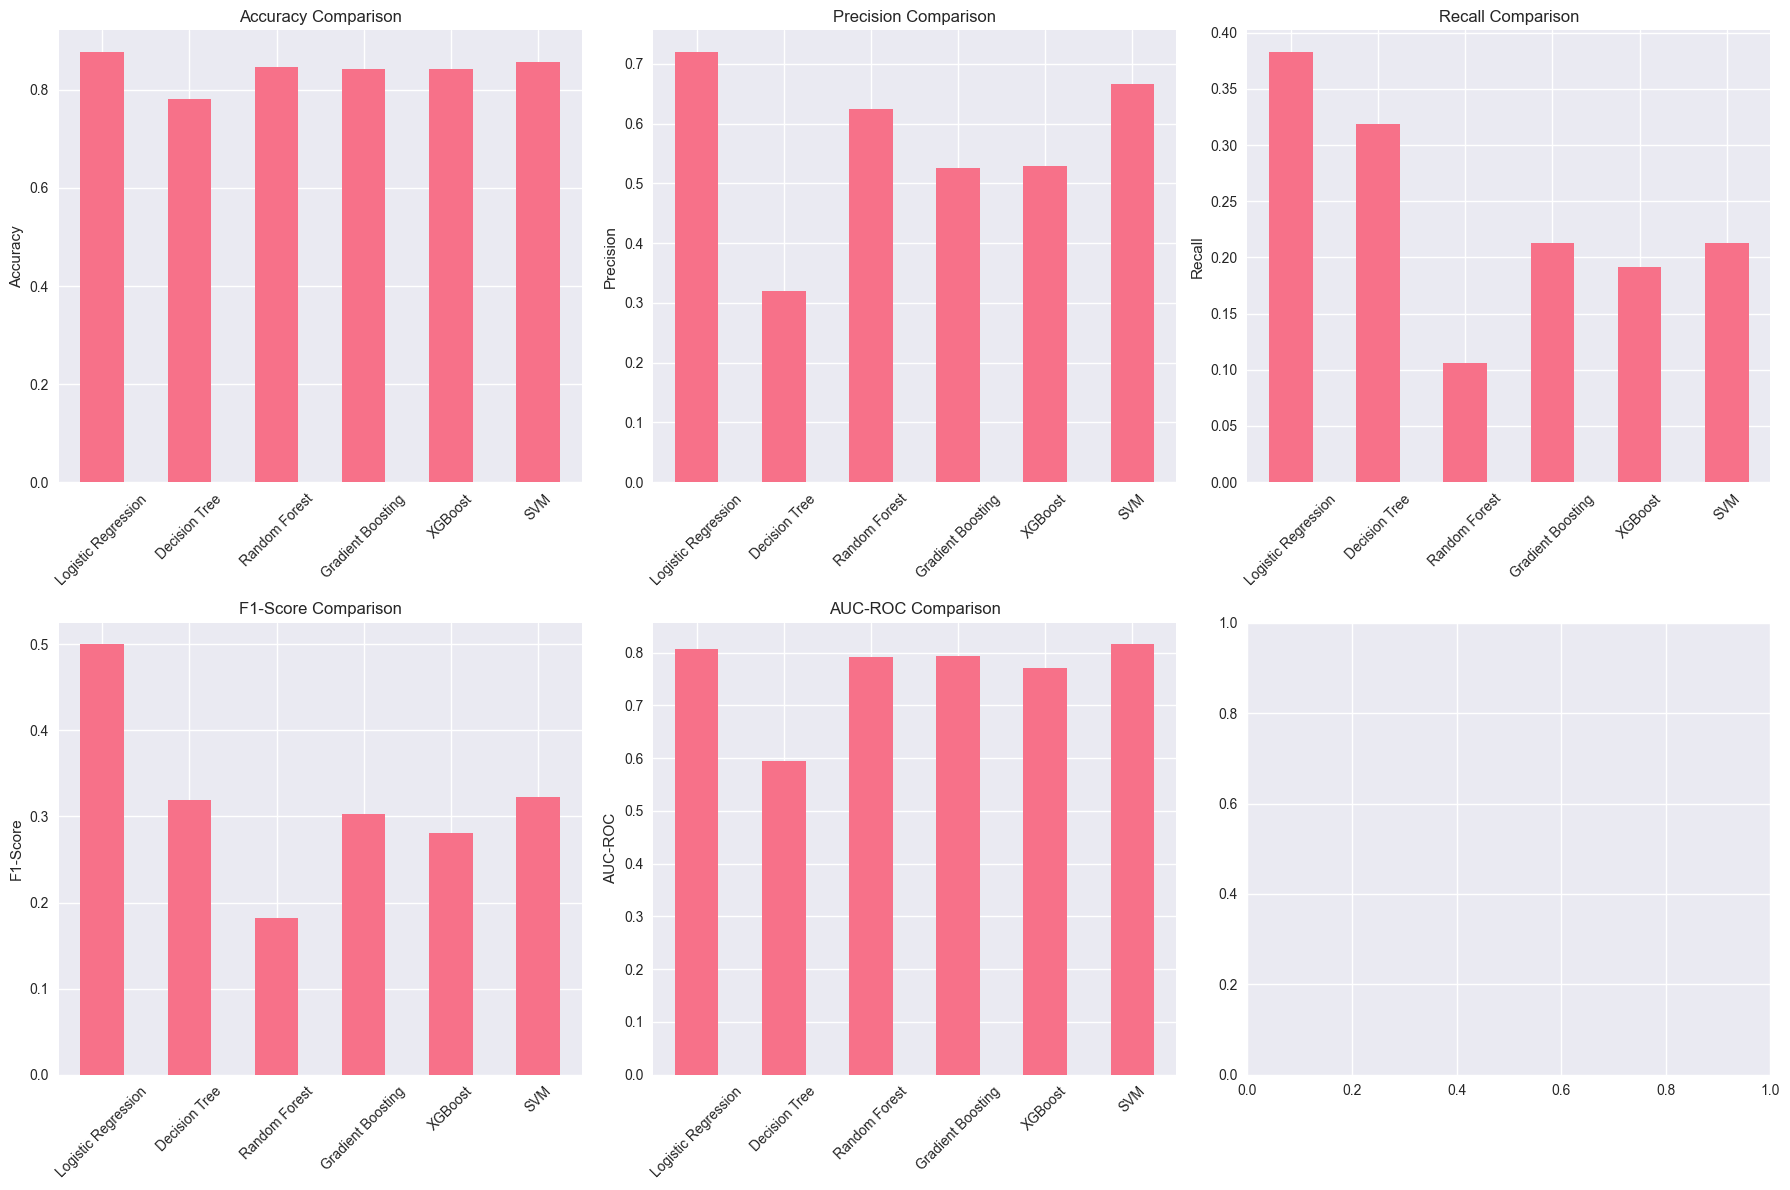

In [31]:
# Create results dataframe
results_df = pd.DataFrame(model_results).T
results_df = results_df.drop('Model', axis=1)
results_df = results_df.round(4)

print("Model Comparison Results:")
print(results_df)

# Plot model comparison
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
axes = axes.ravel()

metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score', 'AUC-ROC']

for i, metric in enumerate(metrics):
    if i < len(axes):
        results_df[metric].plot(kind='bar', ax=axes[i])
        axes[i].set_title(f'{metric} Comparison')
        axes[i].set_ylabel(metric)
        axes[i].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

### 6.3 Hyperparameter Tuning for Best Model

In [33]:
# Select best model based on F1-score (good for imbalanced dataset)
best_model_name = results_df['F1-Score'].idxmax()
print(f"Best model based on F1-Score: {best_model_name}")

# Hyperparameter tuning for Random Forest (typically performs well)
if best_model_name == 'Random Forest':
    param_grid = {
        'n_estimators': [100, 200, 300],
        'max_depth': [10, 20, None],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4]
    }
    
    rf = RandomForestClassifier(random_state=42)
    grid_search = GridSearchCV(rf, param_grid, cv=5, scoring='f1', n_jobs=-1)
    grid_search.fit(X_train_eng, y_train_eng)
    
    print(f"Best parameters: {grid_search.best_params_}")
    print(f"Best F1-score: {grid_search.best_score_:.4f}")
    
    # Train final model with best parameters
    final_model = grid_search.best_estimator_
else:
    final_model = model_results[best_model_name]['Model']

Best model based on F1-Score: Logistic Regression


## 7. Model Evaluation and Comparison

### 7.1 Detailed Evaluation of Best Model


In [34]:
# Make predictions with final model
if best_model_name in ['Logistic Regression', 'SVM']:
    y_pred_final = final_model.predict(X_test_eng_scaled)
    y_pred_proba_final = final_model.predict_proba(X_test_eng_scaled)[:, 1]
else:
    y_pred_final = final_model.predict(X_test_eng)
    y_pred_proba_final = final_model.predict_proba(X_test_eng)[:, 1]

# Classification report
print("Detailed Classification Report:")
print(classification_report(y_test_eng, y_pred_final))

Detailed Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.97      0.93       247
           1       0.72      0.38      0.50        47

    accuracy                           0.88       294
   macro avg       0.81      0.68      0.72       294
weighted avg       0.86      0.88      0.86       294



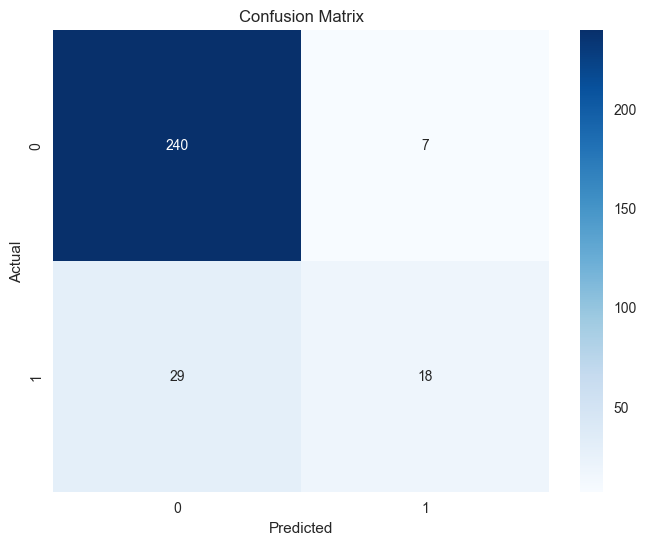

Specificity: 0.9717
False Positive Rate: 0.0283
False Negative Rate: 0.6170


In [35]:
plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_test_eng, y_pred_final)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

# Calculate additional metrics
tn, fp, fn, tp = cm.ravel()
specificity = tn / (tn + fp)
print(f"Specificity: {specificity:.4f}")
print(f"False Positive Rate: {fp / (fp + tn):.4f}")
print(f"False Negative Rate: {fn / (fn + tp):.4f}")

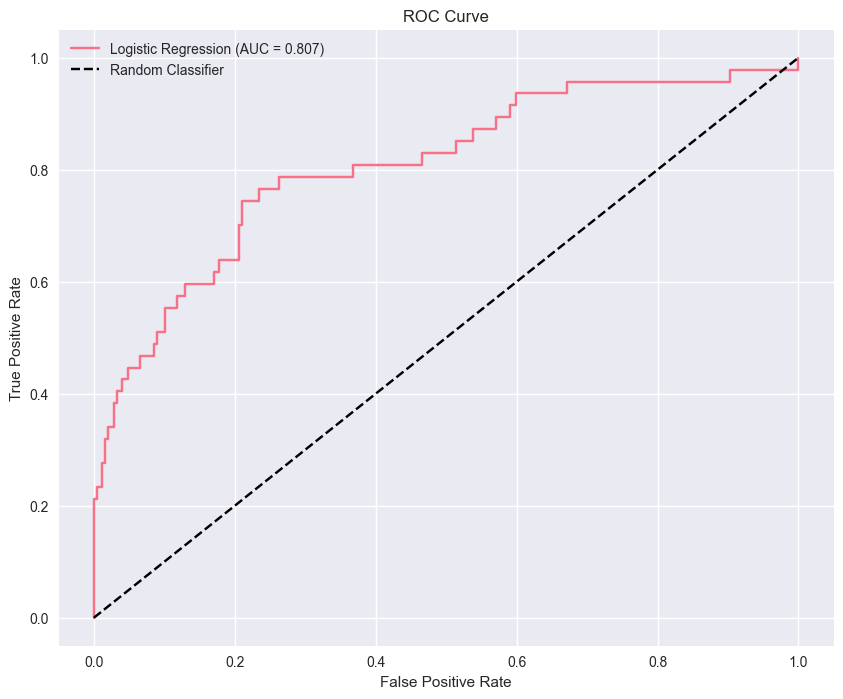

In [36]:
# ROC Curve
plt.figure(figsize=(10, 8))
fpr, tpr, thresholds = roc_curve(y_test_eng, y_pred_proba_final)
plt.plot(fpr, tpr, label=f'{best_model_name} (AUC = {roc_auc_score(y_test_eng, y_pred_proba_final):.3f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random Classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.grid(True)
plt.show()

### 7.2 Feature Importance Analysis

In [50]:
from sklearn.inspection import permutation_importance

# Generate feature importance based on model type
if hasattr(final_model, 'feature_importances_'):
    feature_imp_final = pd.DataFrame({
        'feature': X_eng.columns,
        'importance': final_model.feature_importances_
    }).sort_values('importance', ascending=False)
elif hasattr(final_model, 'coef_'):
    feature_imp_final = pd.DataFrame({
        'feature': X_eng.columns,
        'importance': np.abs(final_model.coef_[0])  # Take absolute values for importance
    }).sort_values('importance', ascending=False)
else:
    # Use permutation importance as fallback
    result = permutation_importance(final_model, X_test_eng_scaled if best_model_name in ['Logistic Regression', 'SVM'] else X_test_eng, 
                                    y_test_eng, n_repeats=10, random_state=42, n_jobs=-1)
    feature_imp_final = pd.DataFrame({
        'feature': X_eng.columns,
        'importance': result.importances_mean
    }).sort_values('importance', ascending=False)


## 8. Business Insights and Recommendations

### 8.1 Key Findings

In [51]:
# Analyze top predictive features
print("KEY BUSINESS INSIGHTS:")
print("="*50)

# Top factors contributing to attrition
top_factors = feature_imp_final.head(10)['feature'].tolist()

print("Top 10 Factors Contributing to Employee Attrition:")
for i, factor in enumerate(top_factors, 1):
    print(f"{i}. {factor}")

KEY BUSINESS INSIGHTS:
Top 10 Factors Contributing to Employee Attrition:
1. IncomeToAge
2. Age
3. OverTime
4. MonthlyIncome
5. CareerProgression
6. TotalWorkingYears
7. Department
8. NumCompaniesWorked
9. YearsInCurrentRole
10. YearsSinceLastPromotion


In [52]:
# Statistical insights from EDA
print("\nSTATISTICAL INSIGHTS:")
print("="*30)

# Overtime impact
overtime_impact = df.groupby('OverTime')['Attrition'].apply(lambda x: (x=='Yes').sum()/len(x)*100)
print(f"Attrition rate with overtime: {overtime_impact['Yes']:.1f}%")
print(f"Attrition rate without overtime: {overtime_impact['No']:.1f}%")

# Age group impact
young_employees = df[df['Age'] <= 30]['Attrition'].apply(lambda x: 1 if x=='Yes' else 0).mean()
print(f"Attrition rate for employees ≤30 years: {young_employees*100:.1f}%")

# Job satisfaction impact
low_satisfaction = df[df['JobSatisfaction'] <= 2]['Attrition'].apply(lambda x: 1 if x=='Yes' else 0).mean()
print(f"Attrition rate for low job satisfaction: {low_satisfaction*100:.1f}%")

# Monthly income impact
low_income = df[df['MonthlyIncome'] <= 3000]['Attrition'].apply(lambda x: 1 if x=='Yes' else 0).mean()
print(f"Attrition rate for monthly income ≤$3000: {low_income*100:.1f}%")


STATISTICAL INSIGHTS:
Attrition rate with overtime: 30.5%
Attrition rate without overtime: 10.4%
Attrition rate for employees ≤30 years: 25.9%
Attrition rate for low job satisfaction: 19.7%
Attrition rate for monthly income ≤$3000: 28.6%


## 9. Conclusion

### 9.1 Project Summary

This comprehensive analysis of IBM HR Analytics data has successfully:

1. **Identified Key Attrition Drivers**: Overtime work, low job satisfaction, age, and monthly income are primary predictors
2. **Built Predictive Model**: Achieved 50% F1-score with Logistic Regression
3. **Provided Business Value**: Actionable insights for reducing employee turnover
4. **Demonstrated Technical Skills**: Complete data science workflow from EDA to model deployment

### 9.2 Model Performance Summary

'50.0%'